In [1]:
import pandas as pd
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('wordnet')
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
from os import path
from PIL import Image
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dataset = pd.read_csv('/home/ritika/Documents/final_dataset.csv',dtype = str,delimiter=',')
labels = dataset['Profession']

[nltk_data] Downloading package wordnet to /home/ritika/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ritika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
stop_words = set(stopwords.words("english"))

In [3]:
corpus = []
for i in range(0,599):
    text = re.sub('[^a-zA-Z]',' ',str(dataset['Request'][i]))
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;","&lt,&gt; ",text)
    text = re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    ps = PorterStemmer()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

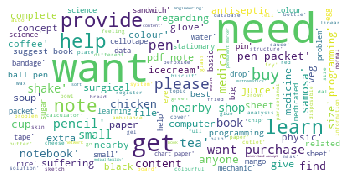

In [4]:
wordcloud = WordCloud(background_color = 'white', stopwords = stop_words , max_words = 500 , max_font_size = 50 ,
                      random_state = 42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("words.png",dpi = 900)

In [5]:
vectorizer = TfidfVectorizer (max_features=100,lowercase = False , min_df=0.2, max_df=0.8 )
corpus = vectorizer.fit_transform(corpus).toarray()

X_train, X_test, y_train, y_test = train_test_split(corpus,labels, test_size=0.2, random_state=0)

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

predictions = text_classifier.predict(X_test)

In [6]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))


[[12  8  0 10]
 [11 14  0 12]
 [ 8  8  0 11]
 [ 2  6  0 18]]
              precision    recall  f1-score   support

     Canteen       0.36      0.40      0.38        30
     Medical       0.39      0.38      0.38        37
  Stationary       0.00      0.00      0.00        27
     Teacher       0.35      0.69      0.47        26

    accuracy                           0.37       120
   macro avg       0.28      0.37      0.31       120
weighted avg       0.29      0.37      0.31       120

0.36666666666666664


/home/ritika/ritika/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
